In [378]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('ENB2012_data.xlsx - Φύλλο1.csv')
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


##part 1

In [379]:
def f(x):
  x = x.sample(frac=1)
  l = len(x)
  traindata = x.iloc[0:int((0.7*l)+1)]
  validationdata = x.iloc[int(0.7*l)+1:int(0.8*l)+1]
  testdata = x.iloc[int(0.8*l)+1::]
  return traindata,validationdata,testdata
tdata,vdata,testdata = f(data)



9 3


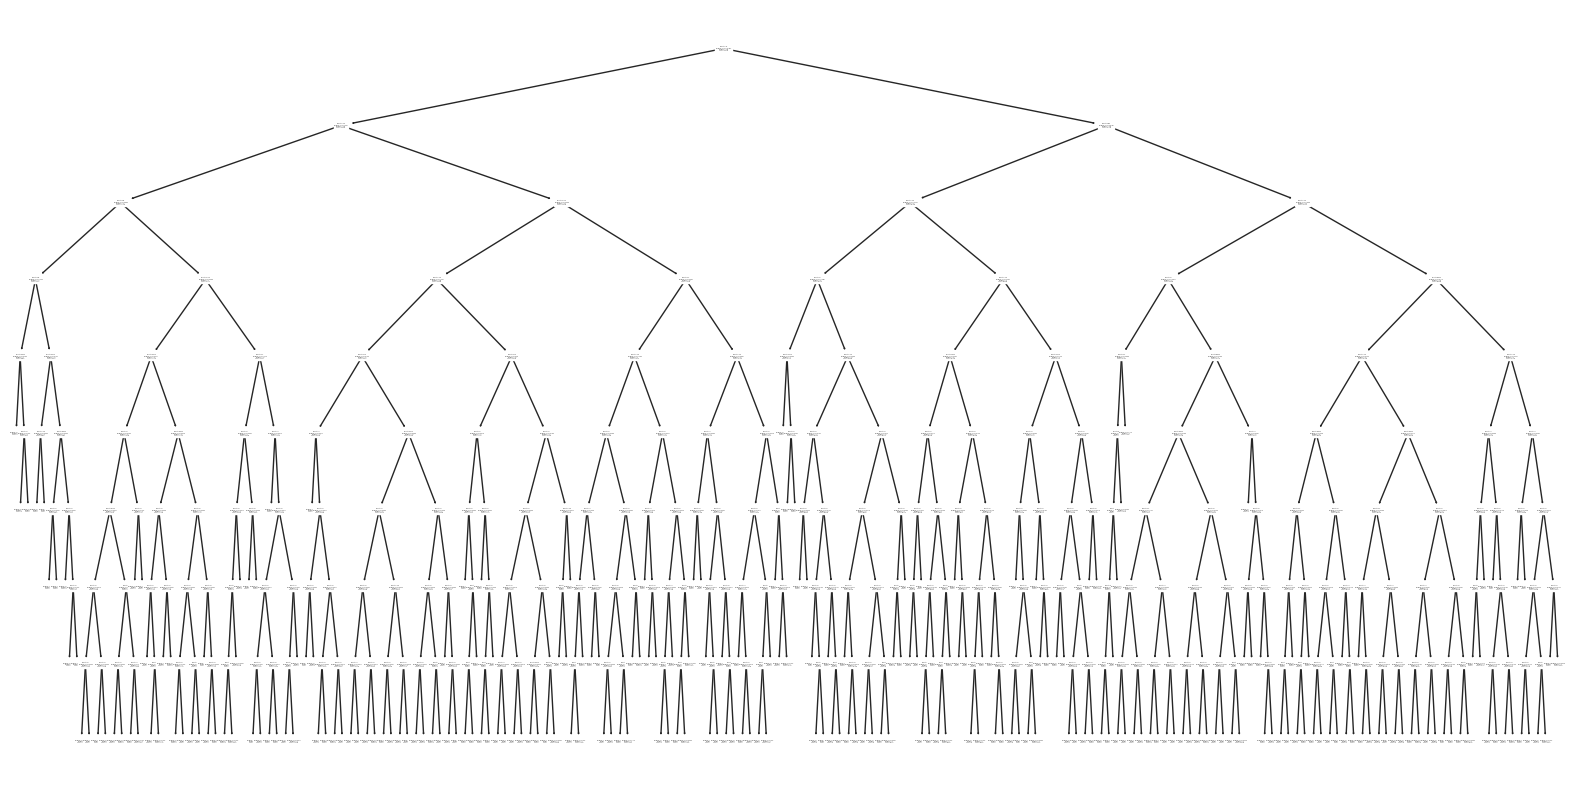

In [380]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
Xtrain = tdata.drop('Y1',axis=1)
Ytrain = tdata['Y1']
Xval = vdata.drop('Y1',axis=1)
Yval = vdata['Y1']
#three lists to store all the points of to make plots of mse vs max depth and mse vs min samples split
md_lst = []
val_lst = []

def train_regression_tree(x_train, y_train, x_val, y_val,maxdepth,minsamsplit):
    min_error = float('inf')
    mdindex = 0
    mssindex = 0  
    # Vary the maximum depth of the tree and the minimum samples per split
    for i in range(1, maxdepth):
        for j in range(2,minsamsplit):
            # Create the decision tree model
            regressor = DecisionTreeRegressor(max_depth=i, min_samples_split=j)
            # Fit the model to the training data
            regressor.fit(x_train, y_train)
            # Make predictions on the validation data
            y_pred = regressor.predict(x_val)
            # Calculate the validation MSE
            val_error = mean_squared_error(y_val, y_pred)
            val_lst.append(val_error)
            md_lst.append(i)
            # if val_error is smaller than min_error than update
            if val_error<min_error:
              min_error = val_error
              mdindex = i
              mssindex = j
    return mdindex,mssindex

# lets give max depth = 10, min samples spilit = 11
md,mss = train_regression_tree(Xtrain,Ytrain,Xval,Yval,10,11)
#printing best max_depth and min_samples_split
print(md,mss)
tree1 = DecisionTreeRegressor(max_depth=md, min_samples_split=mss)
tree1.fit(Xtrain,Ytrain)
plt.figure(figsize=(20,10))
tree.plot_tree(tree1)
plt.show()
#printing the best fit model

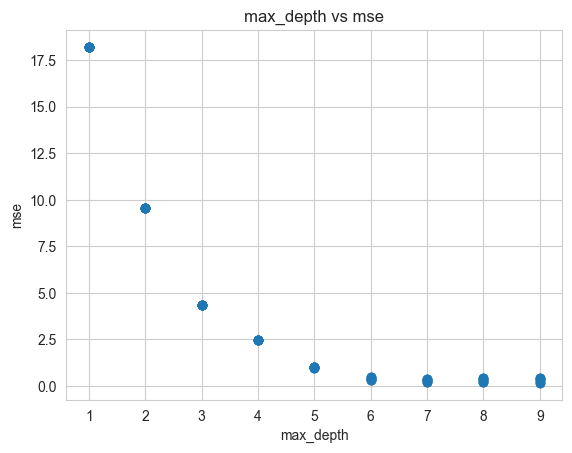

In [381]:
# scatter plot between max_depth and mse
plt.scatter(md_lst, val_lst)
plt.xlabel('max_depth')
plt.ylabel('mse')
plt.title('max_depth vs mse')
plt.show()
#here we can not directly compare mse and min_samples_split because we are checking every value
# of min_samples_split for every max_depth so there is no sense but we can presume one by one tuning of each parameter 

In [382]:
#printing mse for test data for best fit model
X_testdata = testdata.drop('Y1',axis=1)
Y_testdata = testdata['Y1']
y_pred_testdata = tree1.predict(X_testdata)
mse_testdata = mean_squared_error(Y_testdata,y_pred_testdata)
print(mse_testdata)

0.34780380910882874


In [383]:
#performing hold out validation
from sklearn.model_selection import train_test_split
x = data.drop('Y1',axis=1)
y = data['Y1']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
bestfit_holdout = DecisionTreeRegressor(max_depth=md, min_samples_split=mss)
bestfit_holdout.fit(X_train,y_train)
y_holdout = bestfit_holdout.predict(X_test)
mse_holdout = mean_squared_error(y_test,y_holdout)
print(bestfit_holdout.score(X_test,y_test))

print(mse_holdout)

0.9966781446005073
0.34624213635259327


In [384]:
from sklearn. model_selection import cross_val_score
#performing 5-fold cross validation
# we can perform the k fold validation by just giving any other number to k in
from sklearn.model_selection import KFold,RepeatedKFold
# Initialize the KFold splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)
x = data.drop('Y1',axis=1)
y = data['Y1']
bestfit_5fold = DecisionTreeRegressor(max_depth=md, min_samples_split=mss)
accuracy = cross_val_score(bestfit_5fold,x,y,cv=kf)
print(accuracy)
meanacc = accuracy.mean()
print(meanacc)
# Initialize a list to store the MSE for each fold

[0.99667814 0.99771765 0.99707802 0.99632777 0.99719864]
0.9970000450487083


In [385]:
#performing repeated k-fold cross validation
Rkf = RepeatedKFold(n_splits=5,n_repeats=5,random_state=40)
bestfit_kfold = bestfit_5fold
accuracy = cross_val_score(bestfit_kfold,x,y,cv=Rkf)
print(accuracy)
meanacckfold = accuracy.mean()
print(meanacckfold)

[0.99647389 0.99659931 0.99712366 0.9970668  0.99681238 0.99735475
 0.99625627 0.99754083 0.99768932 0.99729889 0.99709991 0.99749025
 0.99744215 0.99685153 0.99712292 0.99526576 0.99589121 0.99706899
 0.99591284 0.99684863 0.99683502 0.99193175 0.99709646 0.99775179
 0.99630234]
0.9966851058620773


0.9966781446005073
0.9972796238121824


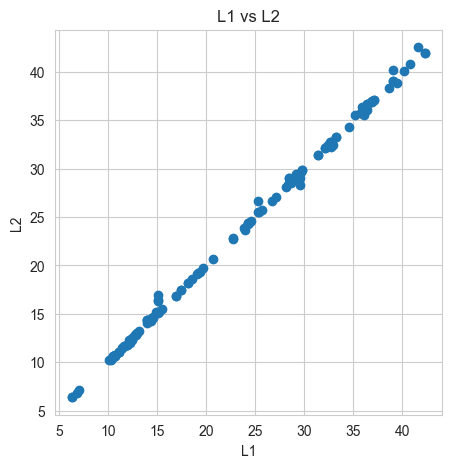

In [386]:
#checking which is better acoording to L1 and L2 criterion
from mlxtend.plotting import plot_decision_regions
# Create a decision tree regressor with L1 criterion for split
dt_L1 = DecisionTreeRegressor(criterion='squared_error',min_samples_split=mss,max_depth=md)
dt_L1.fit(X_train, y_train)
y1_pred = dt_L1.predict(X_test)
# print score of dt.L1
print(dt_L1.score(X_test,y_test))
# Create a decision tree regressor with L2 criterion for split
dt_L2 = DecisionTreeRegressor(criterion='absolute_error',min_samples_split=mss,max_depth=md)
dt_L2.fit(X_train, y_train)
y2_pred = dt_L2.predict(X_test)
# print score of dt.L1
print(dt_L2.score(X_test,y_test))
# plot decision boundary between y1_pred and y2_pred
plt.figure(figsize=(5,5))
plt.scatter(y1_pred,y2_pred)
plt.xlabel('L1')
plt.ylabel('L2')
plt.title('L1 vs L2')
plt.show()

##Question 2

In [387]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
data1 = pd.read_csv('iris.data')
x_data = data1.drop(['Sepal length','Sepal width','Class'],axis=1)
y_data = data1['Class']
X = x_data.to_numpy()
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)
Y = y_data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
data1
tree_1 = DecisionTreeClassifier(max_depth=2)
tree_1.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

In [388]:
!pip install -U scikit-learn

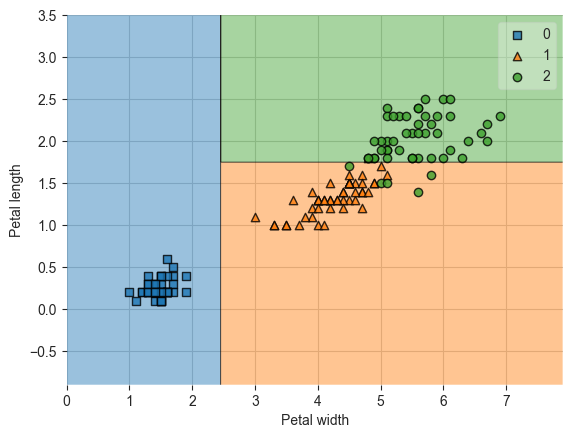

In [389]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from itertools import product
plot_decision_regions(X,Y,clf=tree_1)
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.show()

In [390]:
#deleting the entry from data


In [391]:
data1.drop(72,axis=0,inplace=True)

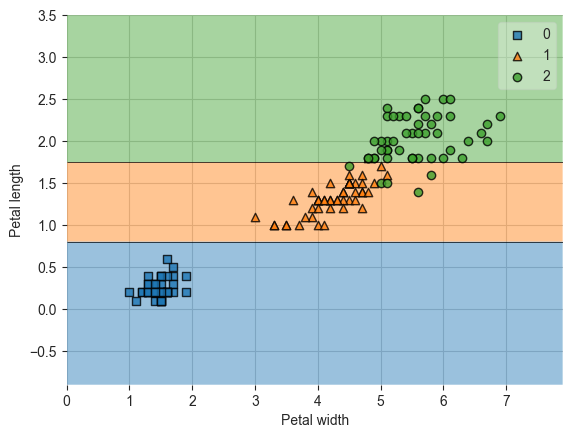

In [392]:
x_data = data1.drop(['Sepal length','Sepal width','Class'],axis=1)
y_data = data1['Class']
X = x_data.to_numpy()
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)
Y = y_data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
data1
tree_2 = DecisionTreeClassifier(max_depth=2)
tree_2.fit(X,Y)
plot_decision_regions(X,Y,clf=tree_2)
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.show()

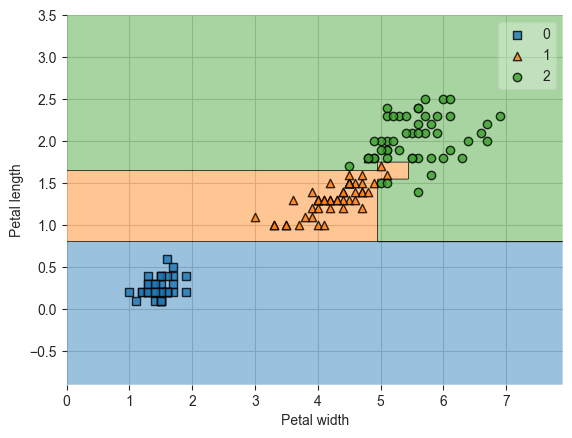

In [393]:
x_data = data1.drop(['Sepal length','Sepal width','Class'],axis=1)
y_data = data1['Class']
X = x_data.to_numpy()
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)
Y = y_data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
data1
tree_3 = DecisionTreeClassifier(max_depth=None)
tree_3.fit(X,Y)
plot_decision_regions(X,Y,clf=tree_3)
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.show()

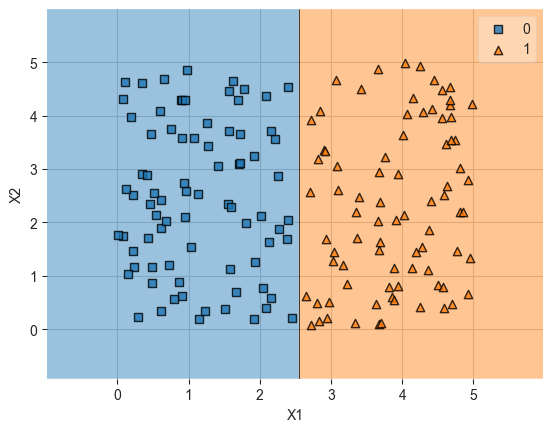

In [394]:
X1 = np.random.uniform(0, 2.5, size=100)
X2 = np.random.uniform(0, 5, size=100)
y = np.zeros(100)
X_1 = np.random.uniform(2.5, 5, size=100)
X_2 = np.random.uniform(0, 5, size=100)
y_1 = np.ones(100)
X1 = np.concatenate((X1, X_1))
X2 = np.concatenate((X2, X_2))
Y = np.concatenate((y, y_1))
Y=Y.astype('int')
X = np.column_stack((X1, X2))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree_4 = DecisionTreeClassifier(max_depth=2)
tree_4.fit(X,Y)
plot_decision_regions(x_train,y_train,clf=tree_4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

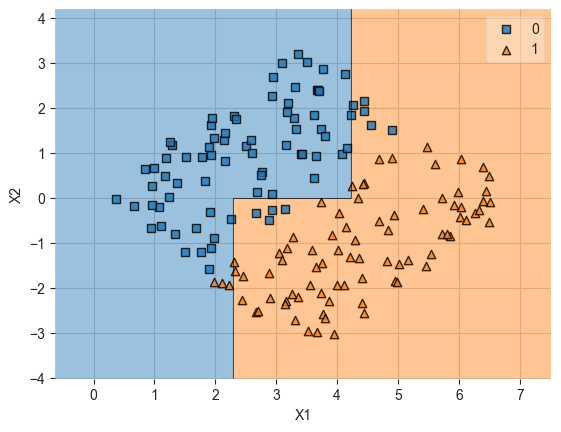

In [395]:
for i in range(200):
  x1 = X[i][0]
  x2 = X[i][1]
  X[i][0] = (x1+x2)/(2**(0.5))
  X[i][1] = (x2-x1)/(2**(0.5))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree_5 = DecisionTreeClassifier(max_depth=2)
tree_5.fit(X,Y)
plot_decision_regions(x_train,y_train,clf=tree_5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



c:\python 3.11\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


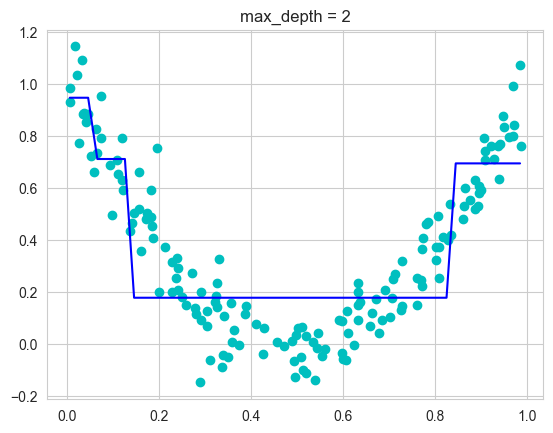

In [396]:
data = pd.read_csv('task.csv')
data

X_data = data.drop(['Y'],axis=1)
Y_data = data.drop(['X'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,random_state=32,train_size=0.8, shuffle=True)

x_1 = X_train.to_numpy()
y_1 = y_train.to_numpy()
x_2 = X_test.to_numpy()
y_2 = y_test.to_numpy()

tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X_train,y_train)
plt.scatter(x_1,y_1,color='c')
Grid_X = np.arange(x_1.min(),x_1.max(),0.02)
Grid_X = Grid_X.reshape(len(Grid_X),1)

plt.plot(Grid_X,tree.predict(Grid_X),color='b')
plt.title('max_depth = 2')
plt.show()


c:\python 3.11\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


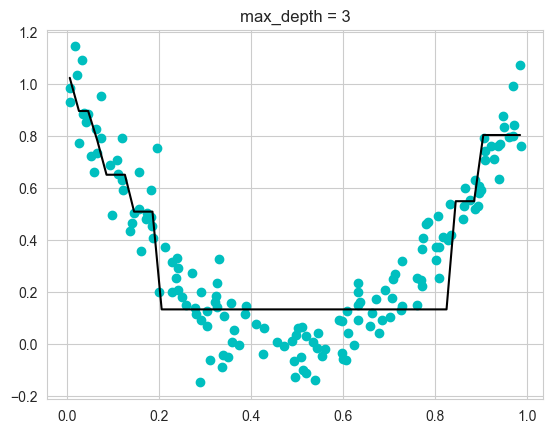

In [397]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X_train,y_train)

plt.scatter(x_1,y_1,color='c')

Grid_X = np.arange(x_1.min(),x_1.max(),0.02)
Grid_X = Grid_X.reshape(len(Grid_X),1)
plt.plot(Grid_X,tree.predict(Grid_X),color='k')
plt.title('max_depth = 3')
plt.show()

c:\python 3.11\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


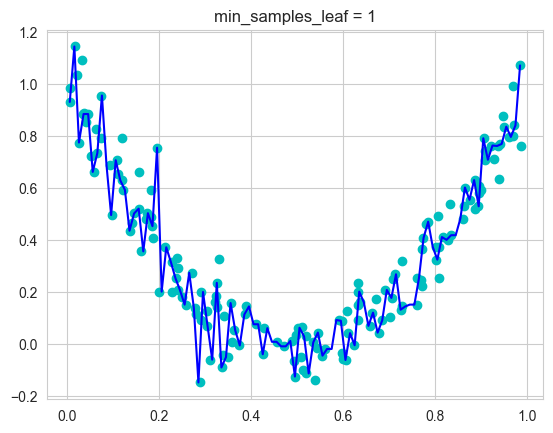

In [398]:
tree = DecisionTreeRegressor( min_samples_leaf = 1)
tree.fit(X_train,y_train)

plt.scatter(x_1,y_1,color='c')

Xgrid = np.arange(x_1.min(),x_1.max(),0.01)
Xgrid = Xgrid.reshape(len(Xgrid),1)

plt.plot(Xgrid,tree.predict(Xgrid),color='b')
plt.title('min_samples_leaf = 1')
plt.show()

c:\python 3.11\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


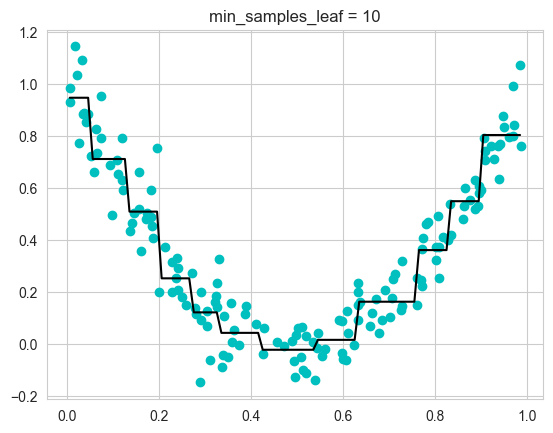

In [399]:
tree = DecisionTreeRegressor( min_samples_leaf = 10)
tree.fit(X_train,y_train)

plt.scatter(x_1,y_1,color='c')

Xgrid = np.arange(x_1.min(),x_1.max(),0.01)
Xgrid = Xgrid.reshape(len(Xgrid),1)

plt.plot(Xgrid,tree.predict(Xgrid),color='k')
plt.title('min_samples_leaf = 10')
plt.show()

In [400]:
## Question 3

In [401]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [402]:
from palmerpenguins import load_penguins
data = load_penguins()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [403]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
data.drop(['sex'],axis=1,inplace=True)
data['bill_length_mm'].fillna(data.bill_length_mm.mean(),inplace=True)
data['bill_depth_mm'].fillna(data.bill_depth_mm.mean(),inplace=True)
data['flipper_length_mm'].fillna(data.flipper_length_mm.mean(),inplace=True)
data['body_mass_g'].fillna(data.body_mass_g.mean(),inplace=True)
X_data = data.drop(['species'],axis=1)
Y_data = data['species']
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [404]:
X_data['bill_length_mm'].fillna(X_data.bill_length_mm.mean(),inplace=True)
X_data['bill_depth_mm'].fillna(X_data.bill_depth_mm.mean(),inplace=True)
X_data['flipper_length_mm'].fillna(X_data.flipper_length_mm.mean(),inplace=True)
X_data['body_mass_g'].fillna(X_data.body_mass_g.mean(),inplace=True)

Text(0, 0.5, 'Body Mass')

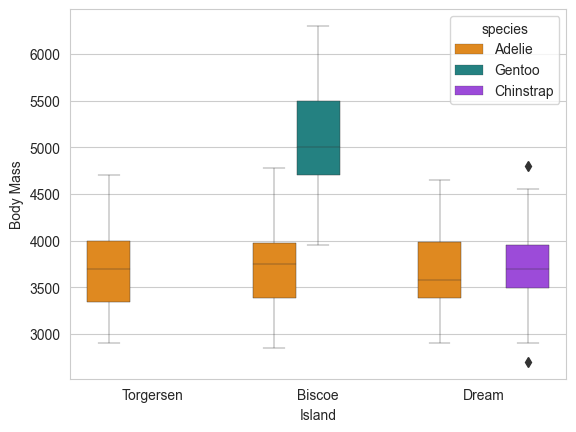

In [405]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = data,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

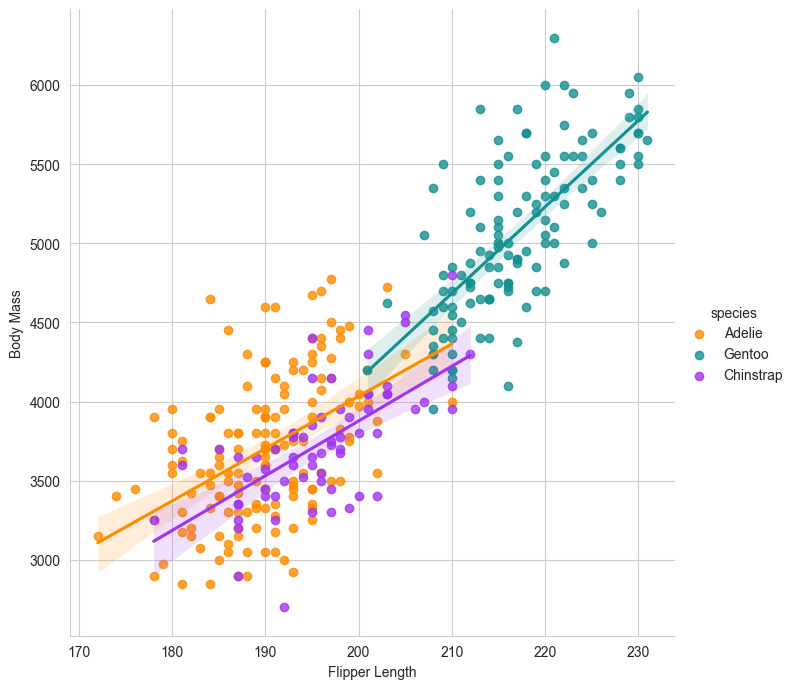

In [406]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=data,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

<AxesSubplot: xlabel='island', ylabel='count'>

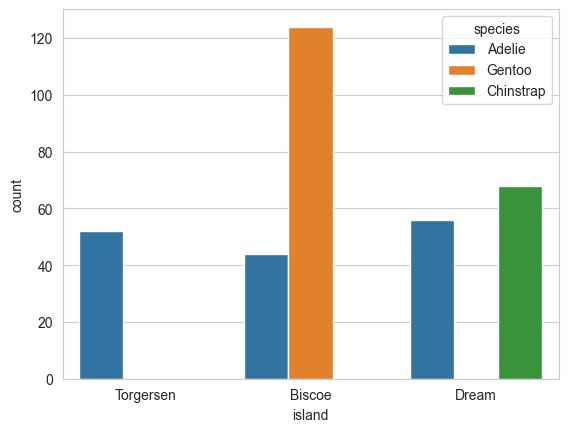

In [407]:
sns.countplot(data=X_data,x='island',hue=Y_data)

<AxesSubplot: xlabel='year', ylabel='count'>

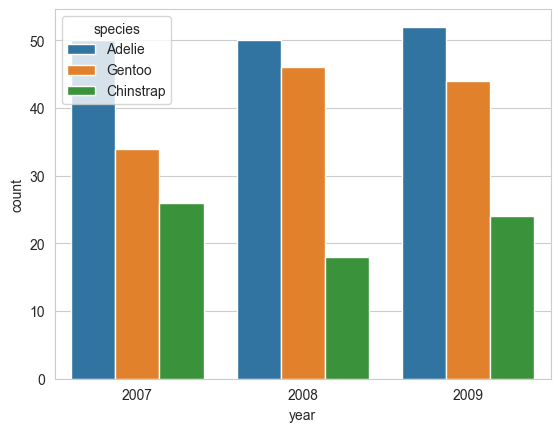

In [408]:
sns.countplot(data=X_data,x='year',hue=Y_data)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

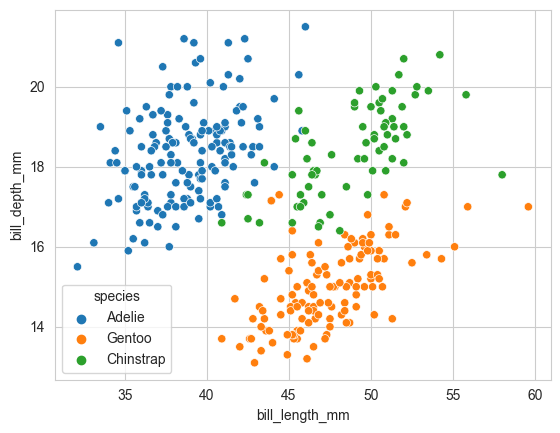

In [409]:
sns.scatterplot(data=X_data,x='bill_length_mm',y='bill_depth_mm',hue=Y_data)

<AxesSubplot: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

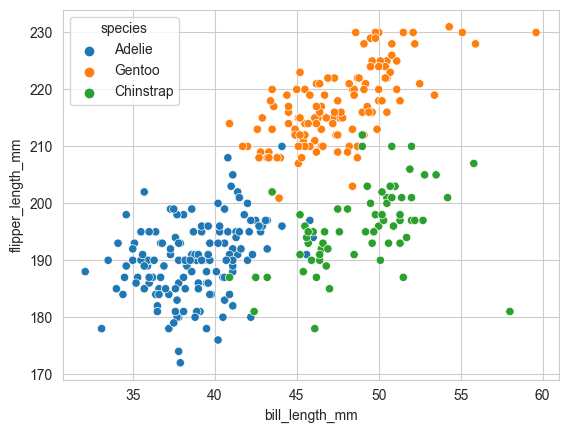

In [410]:
sns.scatterplot(data=X_data,x='bill_length_mm',y='flipper_length_mm',hue=Y_data)

<AxesSubplot: xlabel='body_mass_g', ylabel='flipper_length_mm'>

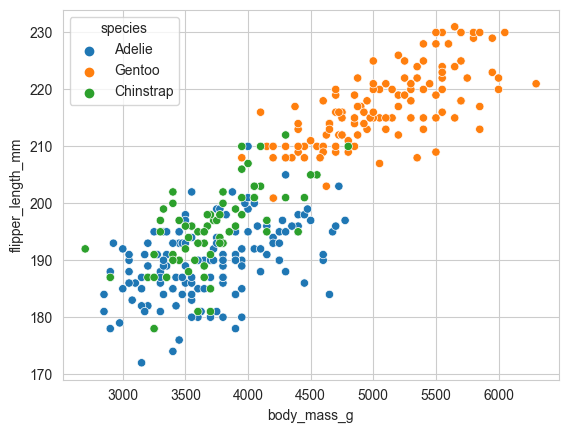

In [411]:
sns.scatterplot(data=X_data,x='body_mass_g',y='flipper_length_mm',hue=Y_data)

<AxesSubplot: xlabel='body_mass_g', ylabel='bill_length_mm'>

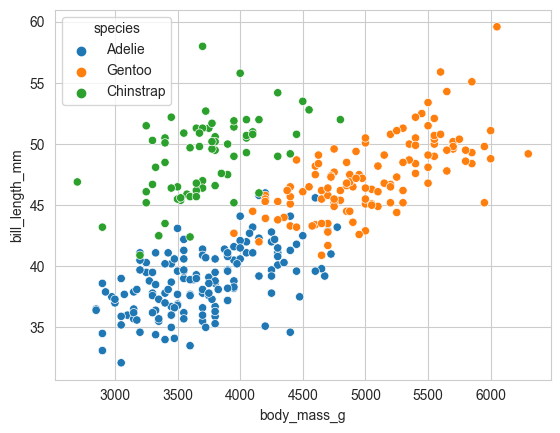

In [412]:
sns.scatterplot(data=X_data,x='body_mass_g',y='bill_length_mm',hue=Y_data)

In [413]:
# ecoding island usnig categorical encoding and year using ordinal encoding
from sklearn import preprocessing
X_data = pd.get_dummies(X_data, columns=['island','year'])
# label_encoder = preprocessing.LabelEncoder()
# X_data['year']= label_encoder.fit_transform(X_data['year'])
# X_data['year'].unique()
X_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,year_2007,year_2008,year_2009
0,39.10000,18.70000,181.000000,3750.000000,0,0,1,1,0,0
1,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,1,1,0,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,1,0,0
4,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,0,1,0,0,0,1
340,43.50000,18.10000,202.000000,3400.000000,0,1,0,0,0,1
341,49.60000,18.20000,193.000000,3775.000000,0,1,0,0,0,1
342,50.80000,19.00000,210.000000,4100.000000,0,1,0,0,0,1


In [414]:
Y_data = pd.DataFrame(Y_data, columns = ['species'])
Y_data

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Chinstrap
340,Chinstrap
341,Chinstrap
342,Chinstrap


In [415]:
Y_data['species']= label_encoder.fit_transform(Y_data['species'])
Y_data['species'].unique()
Y_data

,species
0,0
1,0
2,0
3,0
4,0
...,...
339,1
340,1
341,1
342,1


In [416]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,test_size=0.2, random_state=5)
y_train

,species
157,2
201,2
98,0
268,2
213,2
...,...
8,0
73,0
118,0
189,2


In [417]:
def entropy(target_col):  
    
    elements,counts = np.unique(target_col,return_counts = True)
    for i in range(len(elements)):  
        entropy = np.sum(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))  
    return entropy  
print(entropy(y_train))

0.5307198966433953


In [418]:
def InfoGain(data,attribute,y):   
    entropy_S = entropy(y)     
    vals,counts= np.unique(data[attribute],return_counts=True)
    for i in range(len(vals)):
        Weighted_entropy_Sv = np.sum(counts[i]/np.sum(counts))*entropy(data.where(data[attribute]==vals[i]))  
    Info_Gain = entropy_S-Weighted_entropy_Sv
    return Info_Gain
print(InfoGain(X_train,'year_2007',y_train))  

0.40964870400448905


In [419]:
def thresholds(x_sort,y_sort):
    threshold=[]
    for i in range(1,len(x_sort)):
        if y_sort[i] != y_sort[i-1]:
            threshold.append((x_sort[i]+x_sort[i-1])/2)
    return threshold
def con_to_cat(data,attribute,y):
    bestvalue = 0
    bestentropy = float('inf')
    x1 = data[attribute].to_numpy()
    ind = np.argsort(x1)
    y1 = y.to_numpy()
    y_sort = y1[ind]
    x_sort = data[attribute][ind]
    threshold=thresholds(x_sort,y_sort)
    for i in threshold:
        y_1 = y_sort[x_sort<i]
        y_2 = y_sort[x_sort>=i]
        total_entropy = (len(y_1)/len(y_sort))*entropy(y_1)+(len(y_2)/len(y_sort))*entropy(y_2)
        if total_entropy < bestentropy:
            bestentropy = total_entropy
            bestvalue = i
    return bestvalue
print(con_to_cat(X_data,'bill_length_mm',Y_data))
print(con_to_cat(X_data,'bill_depth_mm',Y_data))
print(con_to_cat(X_data,'flipper_length_mm',Y_data))
print(con_to_cat(X_data,'body_mass_g',Y_data))

41.150000000000006
16.35
208.0
4150.0


In [420]:
cont_to_cat_list=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
for col in cont_to_cat_list:
    split=con_to_cat(X_data,col,Y_data)
    X_data[col]=X_data[col].apply(lambda x: 0 if x<=split else 1)
X_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,year_2007,year_2008,year_2009
0,0,1,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,1,1,0,0
3,1,1,0,1,0,0,1,1,0,0
4,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
339,1,1,0,0,0,1,0,0,0,1
340,1,1,0,0,0,1,0,0,0,1
341,1,1,0,0,0,1,0,0,0,1
342,1,1,1,0,0,1,0,0,0,1


In [421]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,test_size=0.2, random_state=20)
y_train

,species
87,0
29,0
62,0
231,2
72,0
...,...
278,1
331,1
218,2
223,2


In [422]:
def bestattribute(X_train,y_train):
    bestattribute = 'island_Biscoe'
    bestinfo = 0
    for key in X_train.keys():
        info = InfoGain(X_train,key,y_train)
        if info > bestinfo:
            bestinfo = info
            bestattribute = key
    return bestattribute
print(bestattribute(X_train,y_train))

def split(X_data,y_data,attribute):
    X_left = X_data[X_data[attribute]==0]
    X_right = X_data[X_data[attribute]==1]
    y_left = y_data[X_data[attribute]==0]
    y_right = y_data[X_data[attribute]==1]
    return X_left,X_right,y_left,y_right
X_left,X_right,y_left,y_right = split(X_train,y_train,'bill_length_mm')
X_left

island_Torgersen


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,year_2007,year_2008,year_2009
87,0,1,0,0,0,1,0,0,1,0
29,0,1,0,0,1,0,0,1,0,0
62,0,1,0,0,1,0,0,0,1,0
72,0,1,0,0,0,0,1,0,1,0
8,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
144,0,1,0,0,0,1,0,0,0,1
40,0,1,0,0,0,1,0,1,0,0
118,0,1,0,0,0,0,1,0,0,1
162,0,0,1,1,1,0,0,1,0,0


In [423]:
def most_frequent(arr):
    unique, counts = np.unique(arr, return_counts=True)
    max_index = np.argmax(counts)
    return unique[max_index]

In [424]:
class DTClassifier():
    def __init__(self,max_depth=5,left=None,right=None  ,feature_index=None,feature=None,InfoGain=None,value=None):
        
        self.max_depth = max_depth
        self.feature = feature
        self.left = left
        self.right = right
        self.curr_depth = 0
        self.X = None
        self.Y = None
        
    def fit(self,X,Y):
        # split until stopping conditions are met
        self.X = X
        self.Y = Y
        if(self.curr_depth==None):
            return self
        if (self.curr_depth>=self.max_depth):
            return self
        
        if(len(np.unique(self.Y))==1):
            self.feature = np.unique(Y)[0]
            return self
        self.feature =  bestattribute(X,Y)
        if(self.feature==None):
            return self
        X_left,X_right,Y_left,Y_right = split(X,Y,self.feature)
        self.left = DTClassifier()
        self.right = DTClassifier()
        self.left.curr_depth=self.curr_depth+1
        self.right.curr_depth=self.curr_depth+1
        self.left=self.left.fit(X_left,Y_left)
        self.right=self.right.fit(X_right,Y_right)
        return self            
    def predict_one_datapoint(self,X):
        if(self.left==None and self.right==None):
            return most_frequent(self.Y)

        if(X[self.feature]==0 and self.left!=None):
            return self.left.predict_one_datapoint(X)
        elif(X[self.feature]==1 and self.right!=None):
            return self.right.predict_one_datapoint(X)
    def predict(self,X):
        Y_pred=[]
        for index,row in X.iterrows():
            Y_pred.append(self.predict_one_datapoint(row))
        return np.array(Y_pred)
dt = DTClassifier(max_depth=5)
dt.fit(X_train, y_train)
Y_pred=dt.predict(X_test)
print(Y_pred)
avgacc = 0
classwiseacc = [0,0,0]
Y_test = np.array(y_test)
for i in range(len(Y_pred)):
    if(Y_pred[i]==Y_test[i]):
        avgacc+=1
        classwiseacc[Y_pred[i]]+=1
avgacc/=len(Y_pred)
classwiseacc[0]/=len(Y_test[Y_test==0])
classwiseacc[1]/=len(Y_test[Y_test==1])
classwiseacc[2]/=len(Y_test[Y_test==2])
print("Average Accuracy: ",avgacc)
print("Classwise Accuracy: ",classwiseacc)


[0 2 0 1 2 2 2 2 2 0 2 2 2 2 0 2 0 1 2 0 1 1 0 2 1 2 1 2 0 0 1 0 0 1 1 0 2
 2 1 0 0 0 1 0 0 1 0 1 1 2 1 1 2 0 0 1 2 1 0 1 2 2 0 1 2 2 2 0 1]
Average Accuracy:  0.9130434782608695
Classwise Accuracy:  [0.8148148148148148, 1.0, 0.9615384615384616]
